In [1]:
from scipy.stats import gamma 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
def gamma_from_mean(mu, sd=None, variance=None):
    """Convert mean to shape (a) and scale of gama distribution.

    See:
        Bolker, Benjamin M. 2008. “Gamma.” In Ecological Models and Data in R, 131–133. Princeton University Press.
        https://en.wikipedia.org/wiki/Gamma_distribution#Maximum_likelihood_estimation
        https://stats.stackexchange.com/questions/342639/how-to-find-alpha-and-beta-from-a-gamma-distribution
        

    Parameters
    ----------
    mean : _type_
        _description_
    sd : _type_, optional
        _description_, by default None
    variance : _type_, optional
        _description_, by default None

    Returns
    -------
    _type_
        _description_
    """
    if variance is None:
        if sd is None:
            variance =1
        else:
            variance = sd**2
    return {'a':(mu**2)/variance, 'scale':variance/mu}

In [3]:
def gamma_df(mu, min_range=1, max_range=500, step=1, sd=None, variance=None, return_gamma_dict=False):
    """Generate dataframe outlining pdf of gamma distrubtion

    Parameters
    ----------
    mu : float or int
        Mean in years
    min_range : int, optional
        Min range value in years, by default 1
    max_range : int, optional
        Max range value in years, by default 500
    sd : float or int, optional
        Standard deviation in years., by default None
    variance : float or int, optional
        Variance in years, by default None

    Returns
    -------
    pandas.DataFrame
        Dataframe outlining pdf of gamma distrubtion for a range.
    """
    range = np.arange(min_range, max_range+step, step=step)
    gamma_dict = gamma_from_mean(mu=mu,sd=sd, variance=variance)
    probabilities = gamma.pdf(x=range,**gamma_dict)
    df = pd.DataFrame({'X':range,'Probability': probabilities})
    if return_gamma_dict:
        return gamma_dict, df
    else:
        df

In [4]:
def mean_rate_years_gamma_df(mu, min_range=1, max_range=500, step=1, sd=None, variance=None, return_gamma_dict=False):
    """Generate dataframe outlining pdf of gamma distrubtion for mean yearly rate.

    Parameters
    ----------
    mu : float or int
        Mean in years
    min_range : int, optional
        Min range value in years, by default 1
    max_range : int, optional
        Max range value in years, by default 500
    sd : float or int, optional
        Standard deviation in years., by default None
    variance : float or int, optional
        Variance in years, by default None

    Returns
    -------
    pandas.DataFrame
        Dataframe outlining pdf of gamma distrubtion for mean yearly rate.
    """
    rate_years = np.arange(min_range, max_range+step, step=step)
    rate_days = rate_years/365
    period_days = 1/rate_days
    gamma_dict = gamma_from_mean(mu=mu,sd=sd, variance=variance)
    probabilities = gamma.pdf(x=rate_years,**gamma_dict)
    df = pd.DataFrame({'Rate per Year':rate_years, 'Rate per Day':rate_days, 'Period in Days': period_days, 'Probability': probabilities})
    if return_gamma_dict:
        return gamma_dict, df
    else:
        df

In [5]:
def mean_rate_years_gamma_plot(mu, min_range=1, max_range=500, sd=None, variance=None):
    """Generate plot outlining pdf of gamma distrubtion for mean yearly rate.

    Parameters
    ----------
    mu : float or int
        Mean in years
    min_range : int, optional
        Min range value in years, by default 1
    max_range : int, optional
        Max range value in years, by default 500
    sd : float or int, optional
        Standard deviation in years., by default None
    variance : float or int, optional
        Variance in years, by default None
    """
    df = mean_rate_years_gamma_df(mu, min_range, max_range, sd, variance)
    fig, axs = plt.subplots(1,3,sharey=True)
    axs[0].plot(df['Rate per Year'], df.Probability, 'r-', lw=1, alpha=0.6)
    axs[1].plot(df['Rate per Day'], df.Probability, 'r-', lw=1, alpha=0.6)
    axs[2].plot(df['Period in Days'], df.Probability, 'r-', lw=1, alpha=0.6)

In [6]:
gamma_dicts = {}

# Infection period gamma distributions

In [7]:
# set mean and standard deviation
mean_infection_period = 7
sigma_yearly = 15
sd_inf_period_daily = 1/(sigma_yearly/365)
sd_inf_period_daily

24.333333333333336

In [8]:
mean_yearly_rate = int(round((1/mean_infection_period)*365))
gamma_dict, df = mean_rate_years_gamma_df(mu=mean_yearly_rate, sd=sigma_yearly, min_range=1, max_range=150, return_gamma_dict=True)
mean_rate_entry = 'Yearly=' + str(mean_yearly_rate) + ', daily= 1/' + str(mean_infection_period)
df['Mean Rate'] = mean_rate_entry
gamma_dicts['Infection Period'] = gamma_dict
df

,Rate per Year,Rate per Day,Period in Days,Probability,Mean Rate
0,1,0.002740,365.000000,4.306742e-16,"Yearly=52, daily= 1/7"
1,2,0.005479,182.500000,7.086962e-13,"Yearly=52, daily= 1/7"
2,3,0.008219,121.666667,4.900317e-11,"Yearly=52, daily= 1/7"
3,4,0.010959,91.250000,9.255527e-10,"Yearly=52, daily= 1/7"
4,5,0.013699,73.000000,8.585466e-09,"Yearly=52, daily= 1/7"
...,...,...,...,...,...
145,146,0.400000,2.500000,8.449227e-07,"Yearly=52, daily= 1/7"
146,147,0.402740,2.482993,7.229507e-07,"Yearly=52, daily= 1/7"
147,148,0.405479,2.466216,6.182711e-07,"Yearly=52, daily= 1/7"
148,149,0.408219,2.449664,5.284826e-07,"Yearly=52, daily= 1/7"


In [9]:
df.columns

Index(['Rate per Year', 'Rate per Day', 'Period in Days', 'Probability',
       'Mean Rate'],
      dtype='object')

In [10]:
df_melt = pd.melt(df, id_vars=['Mean Rate','Probability'])
df_melt

,Mean Rate,Probability,variable,value
0,"Yearly=52, daily= 1/7",4.306742e-16,Rate per Year,1.000000
1,"Yearly=52, daily= 1/7",7.086962e-13,Rate per Year,2.000000
2,"Yearly=52, daily= 1/7",4.900317e-11,Rate per Year,3.000000
3,"Yearly=52, daily= 1/7",9.255527e-10,Rate per Year,4.000000
4,"Yearly=52, daily= 1/7",8.585466e-09,Rate per Year,5.000000
...,...,...,...,...
445,"Yearly=52, daily= 1/7",8.449227e-07,Period in Days,2.500000
446,"Yearly=52, daily= 1/7",7.229507e-07,Period in Days,2.482993
447,"Yearly=52, daily= 1/7",6.182711e-07,Period in Days,2.466216
448,"Yearly=52, daily= 1/7",5.284826e-07,Period in Days,2.449664


In [11]:
df_melt_mod = df_melt[df_melt['Probability']>0.0001]

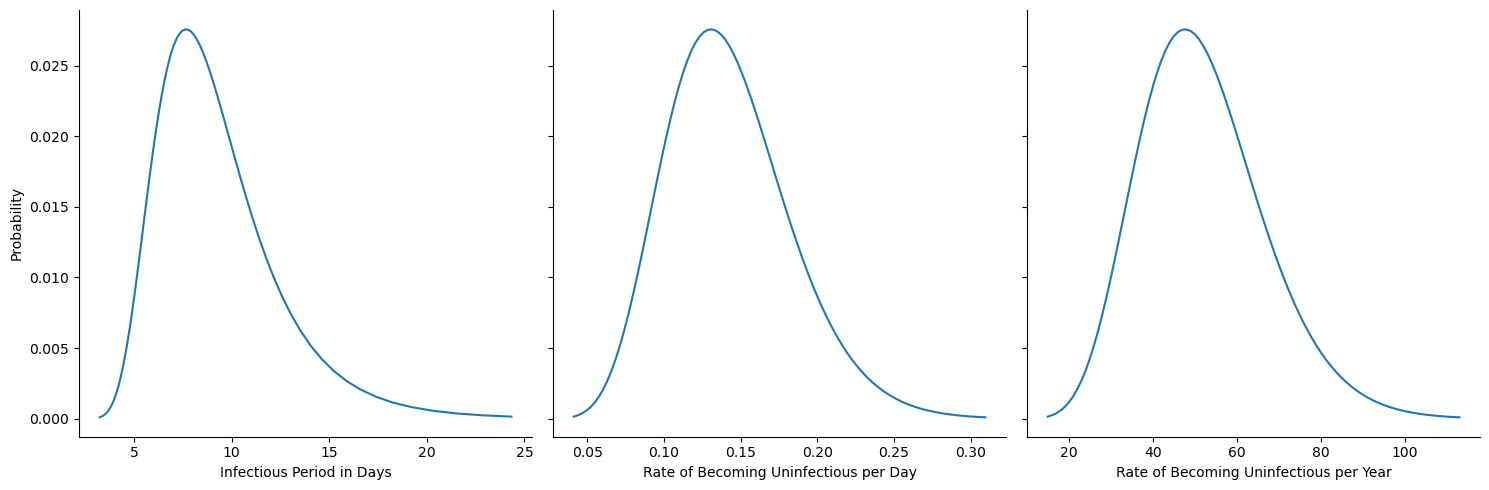

In [12]:
fig = sns.relplot(data=df_melt_mod, x="value", y="Probability",
                  col="variable", col_order=['Period in Days', 'Rate per Day', 'Rate per Year'],
                  kind = 'line',
                  facet_kws={'sharex':False})
fig.set_titles(col_template="")
fig.axes[0,0].set_xlabel('Infectious Period in Days')
fig.axes[0,1].set_xlabel('Rate of Becoming Uninfectious per Day')
fig.axes[0,2].set_xlabel('Rate of Becoming Uninfectious per Year')
plt.tight_layout()

Text(0.5, 0, 'Infectious Period in Days')

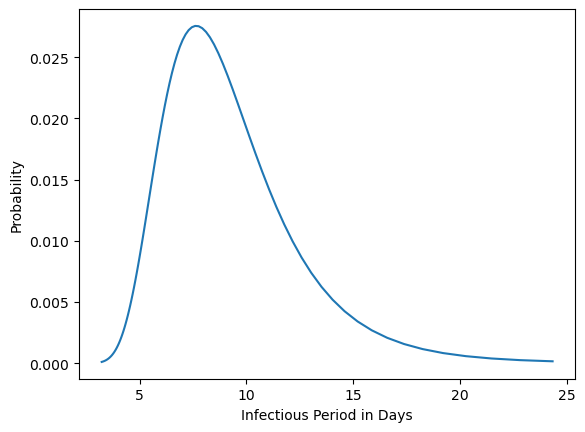

In [13]:
df_plot = df_melt_mod[df_melt_mod['variable']=='Period in Days']
fig = sns.lineplot(data=df_plot, x='value', y="Probability")
fig.set_xlabel('Infectious Period in Days')

# Mean substitution rate

In [27]:
# Set mean and standard devaition of mean
mean_of_mean_subs = 10
sigma_of_subs = 31.6228

In [28]:
gamma_dict, df = gamma_df(mu=mean_of_mean_subs, sd=sigma_of_subs, min_range=0.0001, max_range=0.1, step=0.0001, return_gamma_dict=True)
gamma_dicts['Mean of Substitution Rate'] = gamma_dict
df

,X,Probability
0,0.0001,264.033508
1,0.0002,141.491897
2,0.0003,98.231093
3,0.0004,75.823471
4,0.0005,62.027489
...,...,...
995,0.0996,0.528194
996,0.0997,0.527716
997,0.0998,0.527240
998,0.0999,0.526764


Text(0.5, 0, 'Mean Substitution Rate')

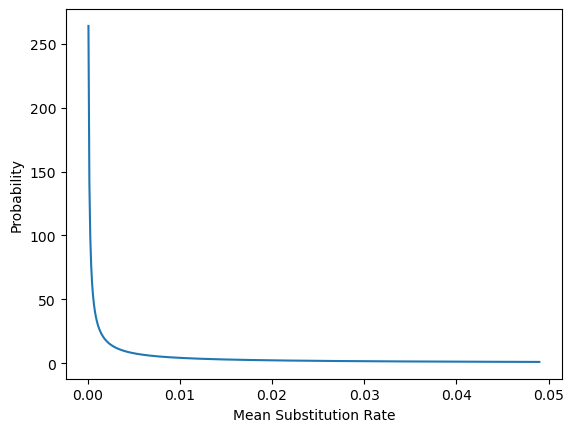

In [29]:
df_plot = df[df['Probability']>1]
fig = sns.lineplot(data=df_plot, x='X', y="Probability")
fig.set_xlabel('Mean Substitution Rate')

In [30]:
gamma_dicts

{'Infection Period': {'a': 12.017777777777777, 'scale': 4.326923076923077},
 'Mean of Substitution Rate': {'a': 0.09999985201621898,
  'scale': 100.00014798400001}}